In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import time
from matplotlib import rcParams
import matplotlib.pyplot as plt
from __future__ import print_function, division
from six import iteritems
%matplotlib inline
rcParams['figure.figsize'] = (13, 6)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Electrcity Data

#### All the sub-/meter power data

In [3]:
file_path = "/content/drive/MyDrive/AA USD/AAI 530 IOT/IOT Project /dataverse_files/Electricity_MHE.csv"
df = pd.read_csv(file_path)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/AA USD/AAI 530 IOT/IOT Project /dataverse_files/Electricity_MHE.csv'

#### Electricity Monthly

In [ ]:
file_path = "/content/drive/MyDrive/AA USD/AAI 530 IOT/IOT Project /dataverse_files/Electricity_Monthly.csv"
df = pd.read_csv(file_path)
df.head(25)

,Month Year,Net Consumption (kWh),Avg Outside Temp (℃),Step 2 Avg (kWh),Similar Homes Nearby (kWh)
0,Apr 2012,NaN,NaN,NaN,NaN
1,May 2012,NaN,NaN,NaN,NaN
2,Jun 2012,NaN,NaN,NaN,NaN
3,Jul 2012,NaN,NaN,NaN,NaN
4,Aug 2012,NaN,NaN,NaN,NaN
5,Sep 2012,NaN,NaN,NaN,NaN
6,Oct 2012,NaN,NaN,NaN,NaN
7,Nov 2012,NaN,NaN,NaN,NaN
8,Dec 2012,953.09,4.5,687.94,762.93
9,Jan 2013,961.38,2.8,687.94,1013.65


#### Whole House Data


In [ ]:
file_path = '/content/drive/MyDrive/AA USD/AAI 530 IOT/IOT Project /dataverse_files/Electricity_WHE.csv'

df = pd.read_csv(file_path)
df.head()

,unix_ts,V,I,f,DPF,APF,P,Pt,Q,Qt,S,St
0,1333263600,236.1,8.3,60.06,1.0,0.93,918,1007560,141,124951,1037,1064237
1,1333263660,236.4,8.2,60.00,1.0,0.93,913,1007577,141,124952,1028,1064256
2,1333263720,236.3,8.0,60.00,1.0,0.93,872,1007592,139,124953,993,1064272
3,1333263780,236.4,8.0,60.00,1.0,0.93,872,1007606,141,124954,990,1064287
4,1333263840,236.0,7.8,60.00,1.0,0.89,772,1007620,140,124955,988,1064302


#### Electricity Billing

In [ ]:
file_path = '/content/drive/MyDrive/AA USD/AAI 530 IOT/IOT Project /dataverse_files/Electricity_Billing.csv'

elec_billing = pd.read_csv(file_path)
elec_billing.head()

,Invoice Date,From Date,To Date,Billing Days,kWh Usage,Daily Average kWh,Basic Charge,Step 1 per kWh Charge,Usage Charge Step 1,Step 1 kWh Threshold,Step 2 per kWh Charge,Usage Charge Step 2,Rate Rider,Total Energy Charge,Regional Transit Levy,Tax,Bill Total
0,2012-04-20,2012-04-01,2012-04-19,19,688,36.2,2.86,0.068,28.70,418,0.1019,27.11,2.93,61.60,1.19,3.23,66.01
1,2012-06-19,2012-04-20,2012-06-18,60,1398,23.3,9.03,0.068,90.58,1332,0.1019,6.73,5.32,111.66,3.74,6.03,121.43
2,2012-08-20,2012-06-19,2012-08-17,60,1361,22.7,9.03,0.068,90.58,1332,0.1019,2.96,5.13,107.70,3.74,5.83,117.27
3,2012-10-19,2012-08-18,2012-10-18,62,1423,23.0,9.33,0.068,93.57,1376,0.1019,4.79,5.38,113.07,3.87,6.12,123.06
4,2012-12-20,2012-10-19,2012-12-19,62,2067,33.3,9.33,0.068,93.57,1376,0.1019,70.41,8.67,181.98,3.87,9.56,195.41


#### Electricity Monthly

In [ ]:
file_path = '/content/drive/MyDrive/AA USD/AAI 530 IOT/IOT Project /dataverse_files/Electricity_Monthly.csv'

elec_monthly = pd.read_csv(file_path)
elec_monthly.head(50)

,Month Year,Net Consumption (kWh),Avg Outside Temp (℃),Step 2 Avg (kWh),Similar Homes Nearby (kWh)
0,Apr 2012,NaN,NaN,NaN,NaN
1,May 2012,NaN,NaN,NaN,NaN
2,Jun 2012,NaN,NaN,NaN,NaN
3,Jul 2012,NaN,NaN,NaN,NaN
4,Aug 2012,NaN,NaN,NaN,NaN
5,Sep 2012,NaN,NaN,NaN,NaN
6,Oct 2012,NaN,NaN,NaN,NaN
7,Nov 2012,NaN,NaN,NaN,NaN
8,Dec 2012,953.09,4.5,687.94,762.93
9,Jan 2013,961.38,2.8,687.94,1013.65


In [ ]:
I, P, Q, and S

#### Metered Data

In [ ]:


# Set the path to the directory where your CSV files are stored
folder_path = '/content/drive/MyDrive/AA USD/AAI 530 IOT/IOT Project /dataverse_files/'  # Replace with the path to your folder

# Use glob to find all CSV files in the folder that start with 'Electricity'
csv_files = glob.glob(os.path.join(folder_path, 'Electricity*.csv'))

# Initialize a dictionary to store your DataFrames, keyed by file name
dataframes = {}

for file_path in csv_files:
    # Extract the file name (without extension) to use as the DataFrame key
    file_name = os.path.basename(file_path).split('.')[0]

    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Store the DataFrame in the dictionary using the file name as the key
    dataframes[file_name] = df

# Now, you have a dictionary of DataFrames, where each key is a file name
# Example: Access the DataFrame for a file named 'ElectricityUsage.csv' (assuming such a file was found)
# df_electricity_usage = dataframes['ElectricityUsage']


In [ ]:
dataframes.keys()

dict_keys(['Electricity_FRE', 'Electricity_RSE', 'Electricity_GRE', 'Electricity_OFE', 'Electricity_TVE', 'Electricity_DWE', 'Electricity_Monthly', 'Electricity_EBE', 'Electricity_Q', 'Electricity_UTE', 'Electricity_BME', 'Electricity_CWE', 'Electricity_WHE', 'Electricity_DNE', 'Electricity_CDE', 'Electricity_OUE', 'Electricity_B2E', 'Electricity_HPE', 'Electricity_P', 'Electricity_B1E', 'Electricity_HTE', 'Electricity_Billing', 'Electricity_WOE', 'Electricity_EQE', 'Electricity_FGE', 'Electricity_S', 'Electricity_I'])

#### Meter and Sub-meter

In [ ]:
# Keys of interest
specified_keys = ["B1E", "B2E", "BME", "CDE", "CWE", "DNE", "DWE", "EBE", "EQE", "FGE", "FRE", "GRE", "HPE", "HTE", "OFE", "OUE", "RSE", "TVE", "UTE", "WHE", "WOE"]

# Filter the dictionary to only include keys that start with 'Electricity_' and end with specified meter names
filtered_dataframes = {key: df for key, df in dataframes.items() if key.split('_')[-1] in specified_keys}

# Concatenate the filtered DataFrames, taking the first 50% of rows from each, and adding a 'source' column
concatenated_df = pd.concat(
    [df.iloc[:len(df) // 10].assign(source=key) for key, df in filtered_dataframes.items()]
)


In [ ]:
concatenated_df.shape

(2207520, 13)

In [ ]:
concatenated_df.head()

,unix_ts,V,I,f,DPF,APF,P,Pt,Q,Qt,S,St,source
0,1333263600,118.0,1.3,60.0,0.97,0.67,106,73144,24,14124,157,107888,Electricity_FRE
1,1333263660,118.5,1.3,60.0,0.98,0.68,107,73145,23,14125,159,107890,Electricity_FRE
2,1333263720,118.5,1.3,60.0,0.98,0.67,107,73147,24,14125,159,107893,Electricity_FRE
3,1333263780,118.5,1.3,60.0,0.98,0.67,106,73149,24,14126,158,107896,Electricity_FRE
4,1333263840,117.9,1.3,60.0,0.98,0.67,106,73151,23,14126,158,107898,Electricity_FRE


In [ ]:
# Sort the DataFrame by 'unix_ts' in ascending order
concatenated_df_sorted = concatenated_df.sort_values(by='unix_ts')

# Calculate the number of rows for 10% of the DataFrame
num_rows_10_percent = int(len(concatenated_df_sorted) * 0.1)

# Select the first 10% of the sorted DataFrame to create the subsample
subsampled_df = concatenated_df_sorted.iloc[:num_rows_10_percent]

# This subsampled DataFrame includes the earliest 10% of data based on 'unix_ts',
# and retains the 'source' column to indicate the origin of each row.


In [ ]:
subsampled_df.head()

,unix_ts,V,I,f,DPF,APF,P,Pt,Q,Qt,S,St,source
0,1333263600,118.0,1.3,60.0,0.97,0.67,106,73144,24,14124,157,107888,Electricity_FRE
0,1333263600,118.5,0.4,60.0,0.97,0.76,41,23106,10,5981,54,30909,Electricity_EQE
0,1333263600,236.7,0.5,60.0,1.00,0.04,2,3280,0,1725,63,48208,Electricity_GRE
0,1333263600,118.3,0.0,60.0,1.00,1.00,0,296,0,20,0,309,Electricity_EBE
0,1333263600,235.3,0.4,60.0,0.99,0.70,36,360070,18,69353,52,382580,Electricity_HPE


In [ ]:
subsampled_df.describe()

,unix_ts,V,I,f,DPF,APF,P,Pt,Q,Qt,S,St
count,2.207520e+05,220752.000000,220752.000000,220752.000000,220752.000000,220752.000000,220752.000000,2.207520e+05,220752.000000,220752.000000,220752.000000,2.207520e+05
mean,1.333579e+09,152.379766,1.140005,60.004191,0.933756,0.611596,118.668859,1.007261e+05,22.418012,15745.947910,139.449935,1.160242e+05
std,1.820736e+05,53.572334,3.839744,0.020875,0.166692,0.355428,434.016510,2.468990e+05,71.479111,32789.144538,457.219274,2.590950e+05
min,1.333264e+09,113.800000,0.000000,59.870000,0.060000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,1.333421e+09,118.100000,0.000000,60.000000,0.960000,0.500000,0.000000,3.288000e+03,0.000000,802.000000,0.000000,9.269750e+03
50%,1.333579e+09,119.100000,0.100000,60.000000,1.000000,0.670000,6.000000,1.920200e+04,2.000000,5367.500000,14.000000,3.549250e+04
75%,1.333737e+09,234.900000,0.500000,60.000000,1.000000,0.980000,39.000000,5.197900e+04,13.000000,11444.000000,61.000000,7.818500e+04
max,1.333894e+09,242.500000,93.300000,60.120000,1.000000,1.000000,7855.000000,1.238456e+06,1797.000000,158273.000000,7924.000000,1.311614e+06


<ipython-input-11-f68c2eb3a2c9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_df['date_timestamp'] = pd.to_datetime(subsampled_df['unix_ts'], unit='s')


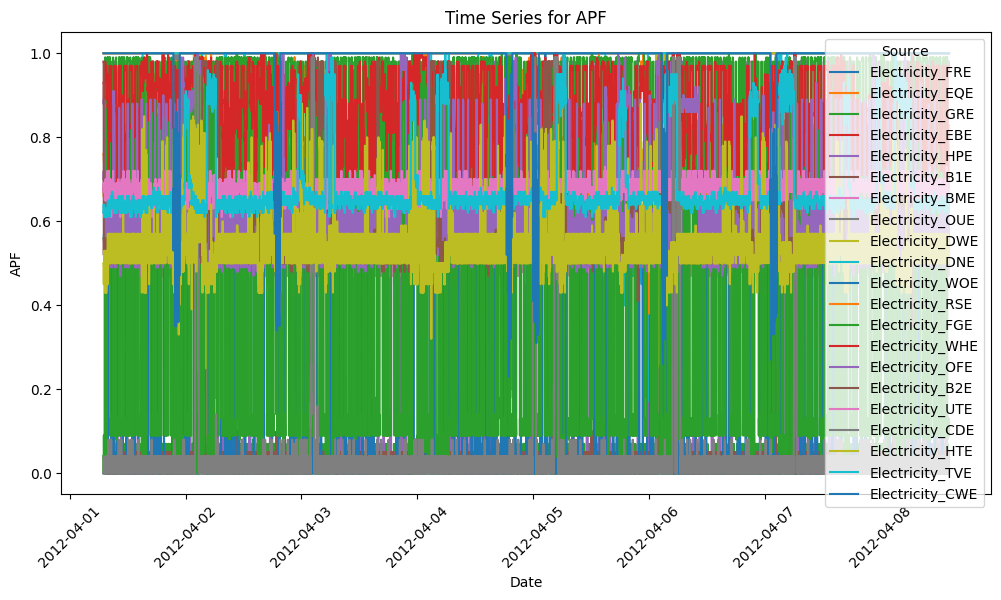

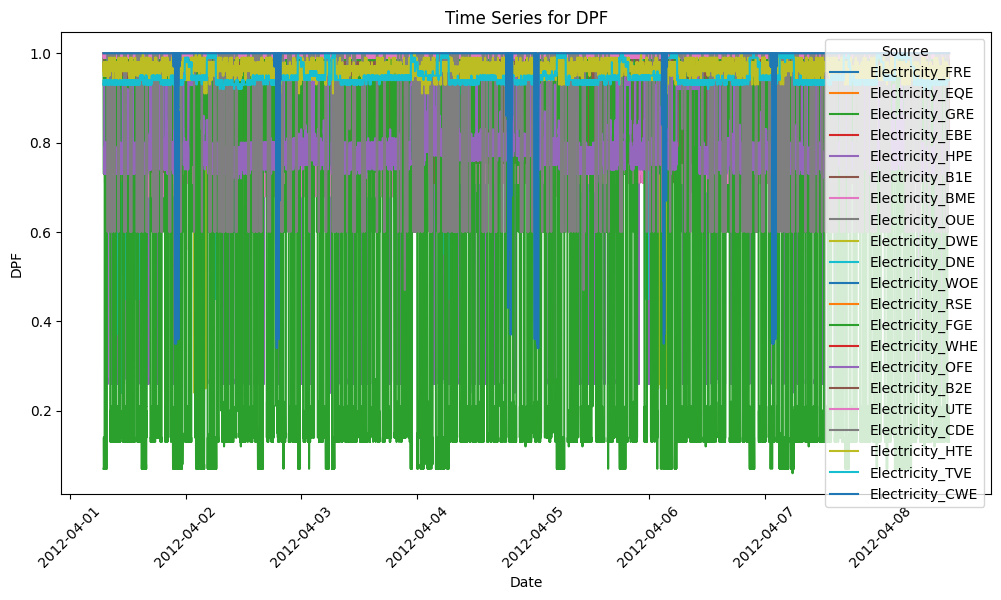

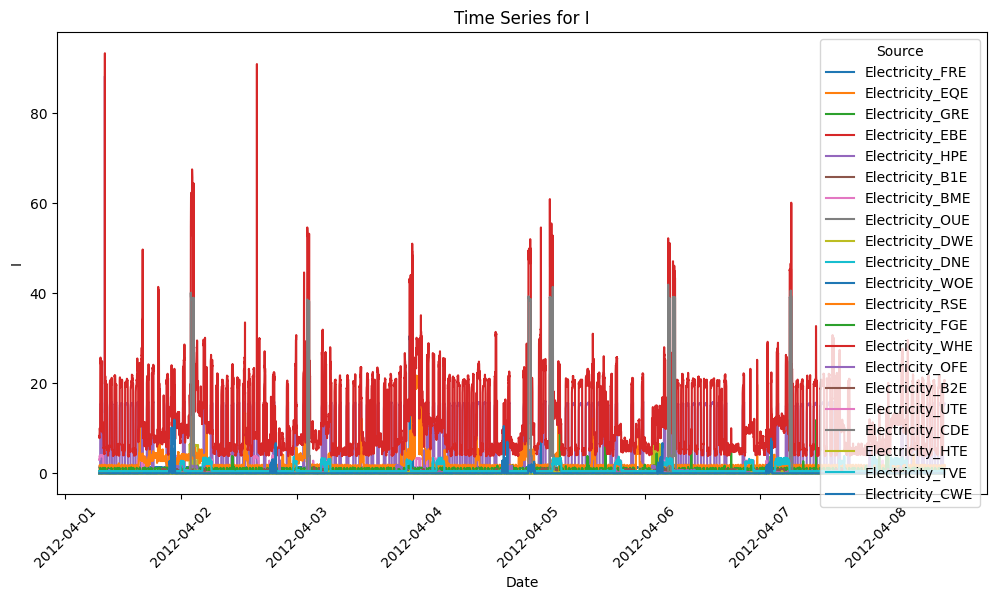

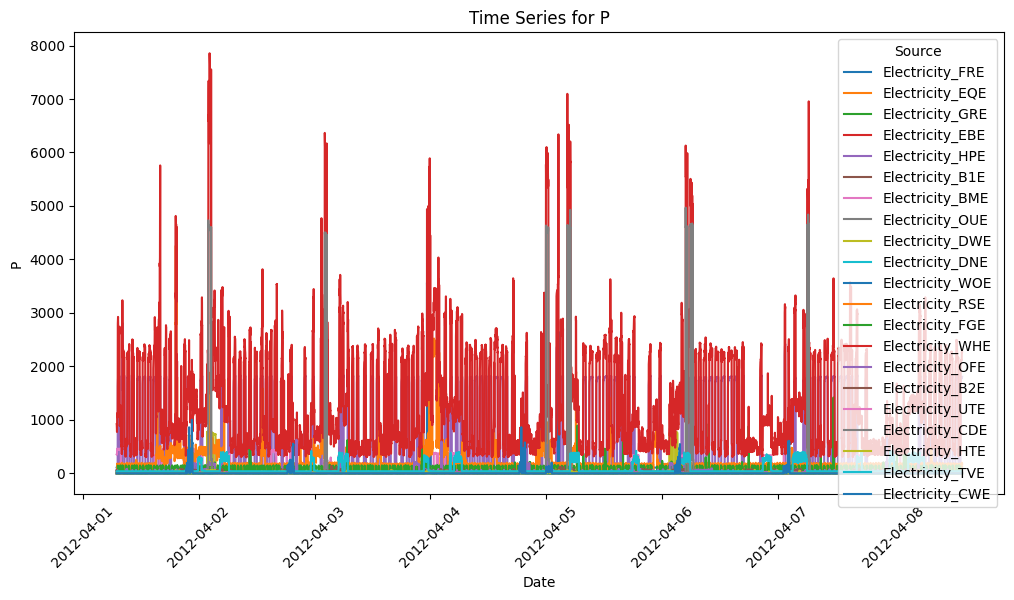

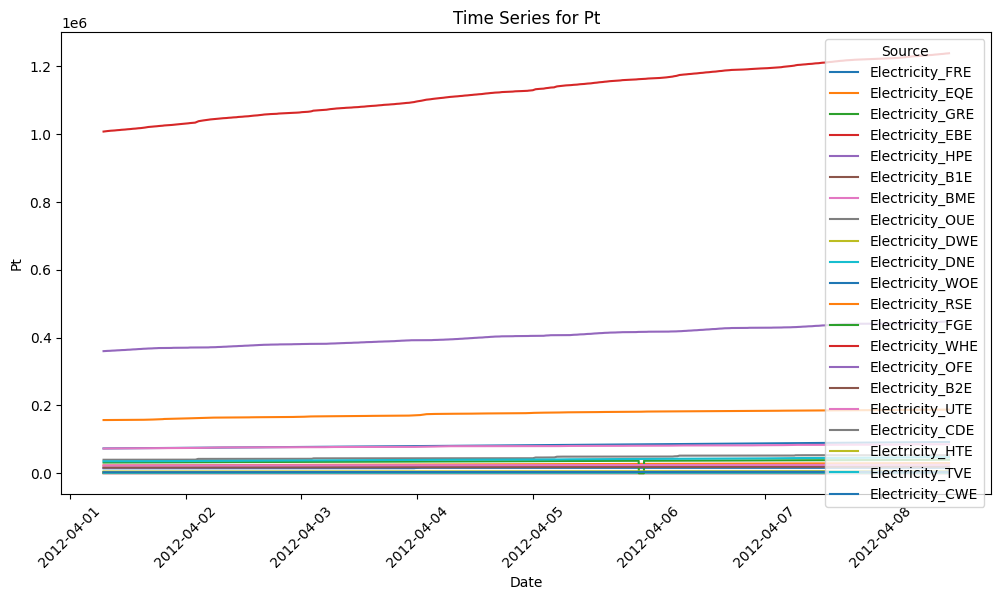

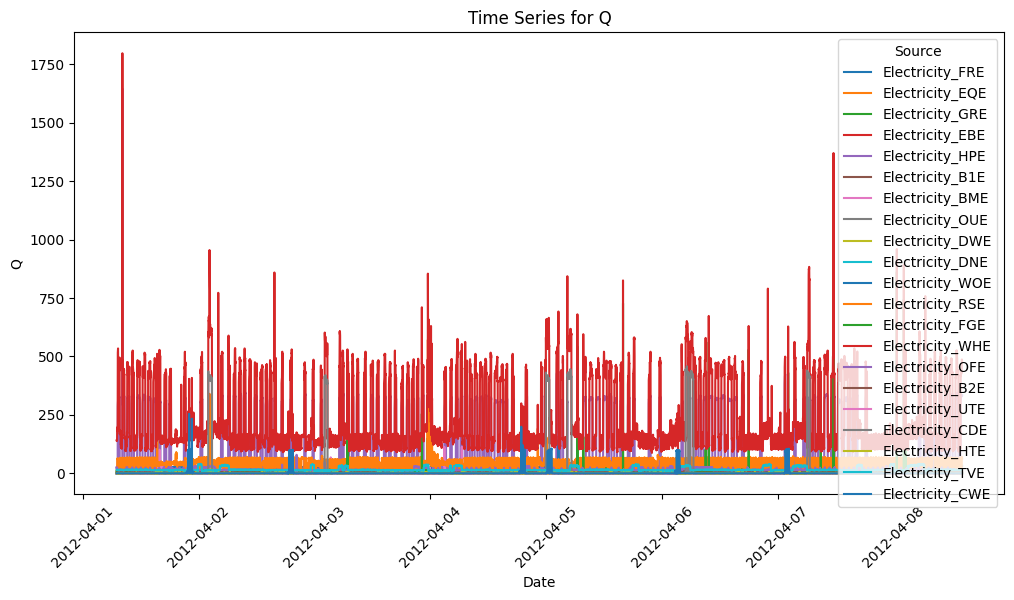

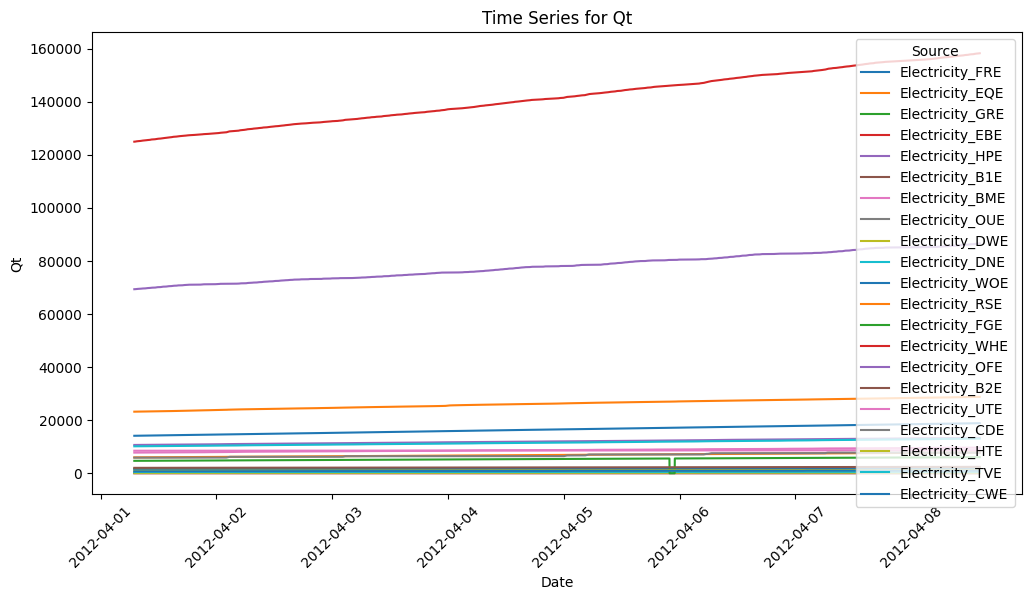

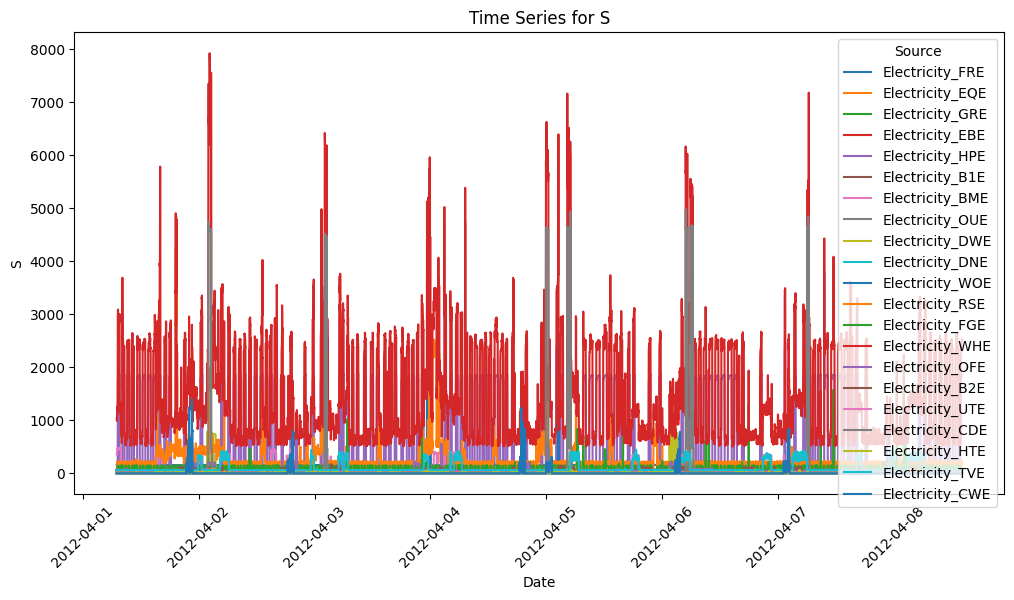

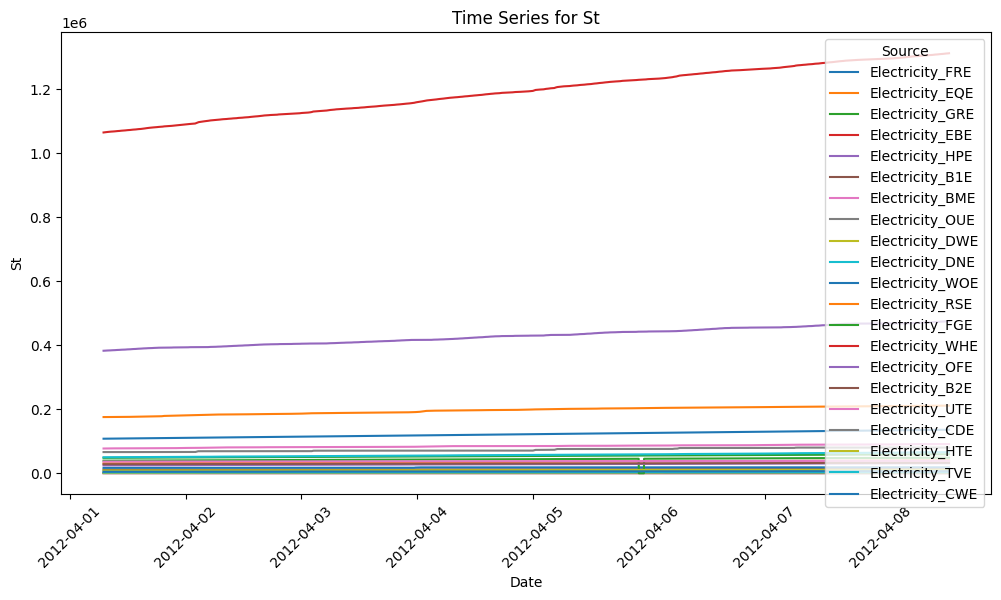

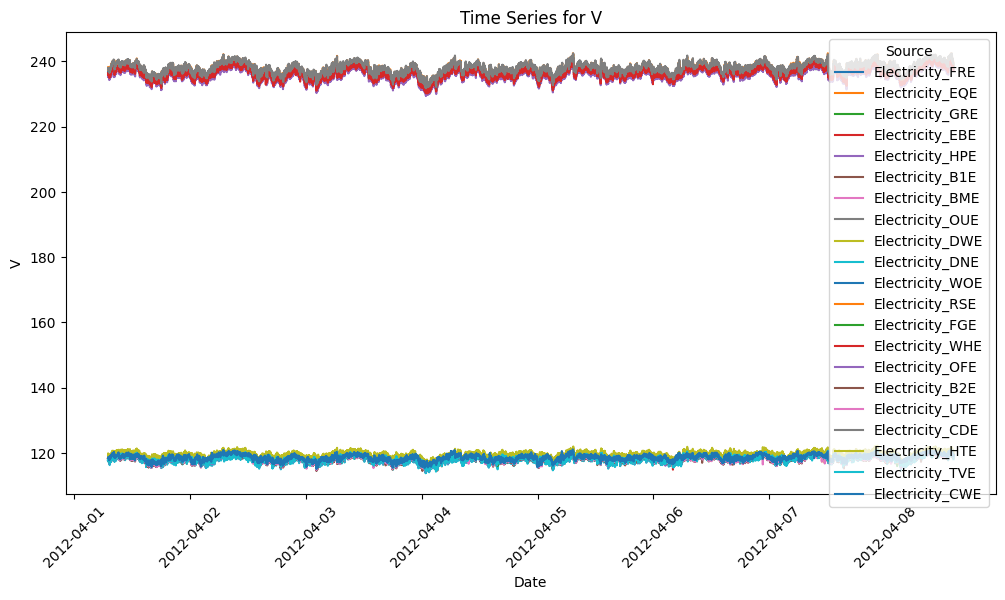

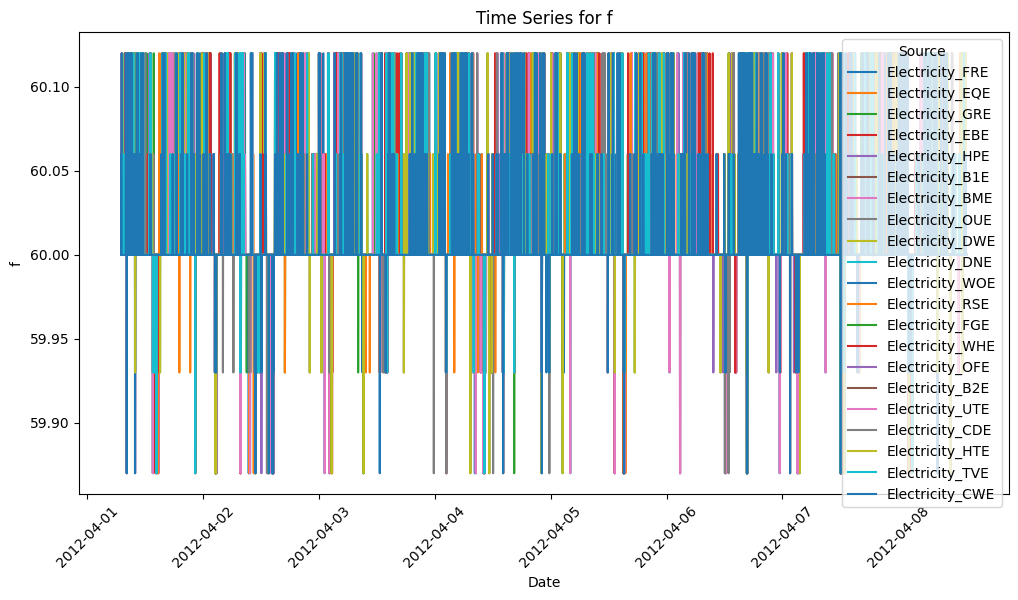

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'subsampled_df' is your DataFrame
# First, ensure 'date_timestamp' is in the correct datetime format
subsampled_df['date_timestamp'] = pd.to_datetime(subsampled_df['unix_ts'], unit='s')

# Identify the columns to plot (excluding 'unix_ts', 'source', 'date_timestamp')
measurement_columns = subsampled_df.columns.difference(['unix_ts', 'source', 'date_timestamp'])

# For each measurement column, create a chart
for measurement in measurement_columns:
    plt.figure(figsize=(12, 6))  # Adjust size as needed

    # Plot each source in the DataFrame
    for source in subsampled_df['source'].unique():
        # Filter data for the current source
        df_filtered = subsampled_df[subsampled_df['source'] == source]

        # Plot the measurement data
        plt.plot(df_filtered['date_timestamp'], df_filtered[measurement], label=source)

    # Customize the plot
    plt.title(f'Time Series for {measurement}')
    plt.xlabel('Date')
    plt.ylabel(measurement)
    plt.legend(title='Source')
    plt.xticks(rotation=45)  # Rotate date labels for better readability

    # Show the plot
    plt.show()


#### Instantaneous Electric

In [ ]:
# Keys of interest
specified_keys = ["I", "P", "Q", "S"]

# Filter the dictionary to only include keys that start with 'Electricity_' and end with specified meter names
filtered_dataframes = {key: df for key, df in dataframes.items() if key.split('_')[-1] in specified_keys}

# Concatenate the filtered DataFrames, taking the first 10% of rows from each, and adding a 'source' column
concatenated_df = pd.concat(
    [df.iloc[:len(df) // 10].assign(source=key) for key, df in filtered_dataframes.items()]
)


In [ ]:
concatenated_df.shape

(420480, 25)

In [ ]:
concatenated_df.head()

,UNIX_TS,WHE,RSE,GRE,MHE,B1E,BME,CWE,DWE,EQE,...,B2E,CDE,DNE,EBE,FGE,HTE,OUE,TVE,UNE,source
0,1333263600,141.0,9.0,0.0,132.0,0.0,26.0,0.0,0.0,10.0,...,2.0,0.0,7.0,0.0,6.0,1.0,0.0,14.0,0.0,Electricity_Q
1,1333263660,141.0,9.0,2.0,130.0,0.0,26.0,0.0,0.0,9.0,...,2.0,0.0,7.0,0.0,6.0,1.0,0.0,14.0,0.0,Electricity_Q
2,1333263720,139.0,9.0,0.0,130.0,0.0,26.0,0.0,0.0,10.0,...,2.0,0.0,7.0,0.0,6.0,0.0,0.0,14.0,0.0,Electricity_Q
3,1333263780,141.0,9.0,2.0,130.0,0.0,26.0,0.0,0.0,10.0,...,2.0,0.0,7.0,0.0,6.0,1.0,0.0,14.0,0.0,Electricity_Q
4,1333263840,140.0,9.0,2.0,129.0,0.0,26.0,0.0,0.0,10.0,...,1.0,0.0,7.0,0.0,6.0,1.0,0.0,14.0,0.0,Electricity_Q


##### get unique sources

In [ ]:
# To list the distinct values of the column 'source'
distinct_sources = concatenated_df['source'].unique()

print(distinct_sources)

['Electricity_Q' 'Electricity_P' 'Electricity_S' 'Electricity_I']


##### check for NAN rows

In [ ]:
nan_rows = concatenated_df[concatenated_df.isnull().any(axis=1)]
nan_rows

,UNIX_TS,WHE,RSE,GRE,MHE,B1E,BME,CWE,DWE,EQE,...,B2E,CDE,DNE,EBE,FGE,HTE,OUE,TVE,UNE,source


#### Put Data into 10%

In [ ]:
# Sort the DataFrame by 'unix_ts' in ascending order
concatenated_df_sorted = concatenated_df.sort_values(by='UNIX_TS')

# Calculate the number of rows for 10% of the DataFrame
num_rows_10_percent = int(len(concatenated_df_sorted) * 0.1)

# Select the first 10% of the sorted DataFrame to create the subsample
subsampled_df = concatenated_df_sorted.iloc[:num_rows_10_percent]

# This subsampled DataFrame includes the earliest 10% of data based on 'unix_ts',
# and retains the 'source' column to indicate the origin of each row.


#### Normal Scaled Values

<ipython-input-29-4bbc9199ce0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_df['date_timestamp'] = pd.to_datetime(subsampled_df['UNIX_TS'], unit='s')


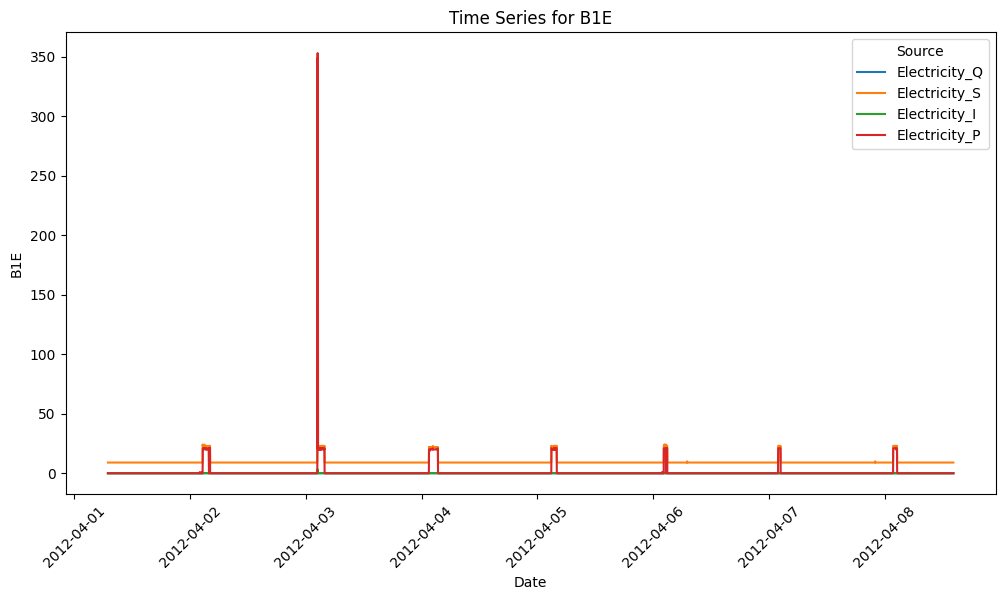

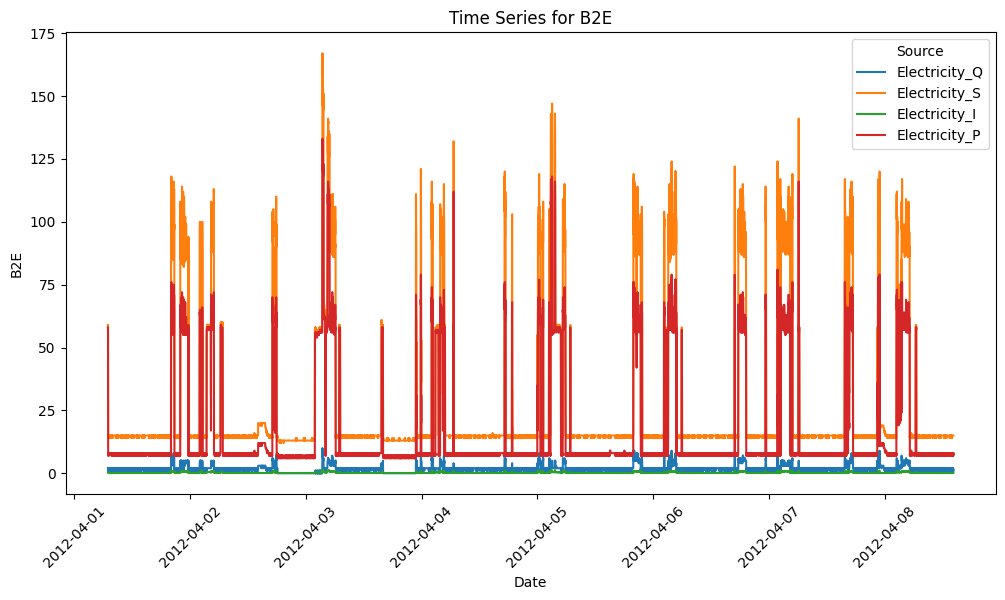

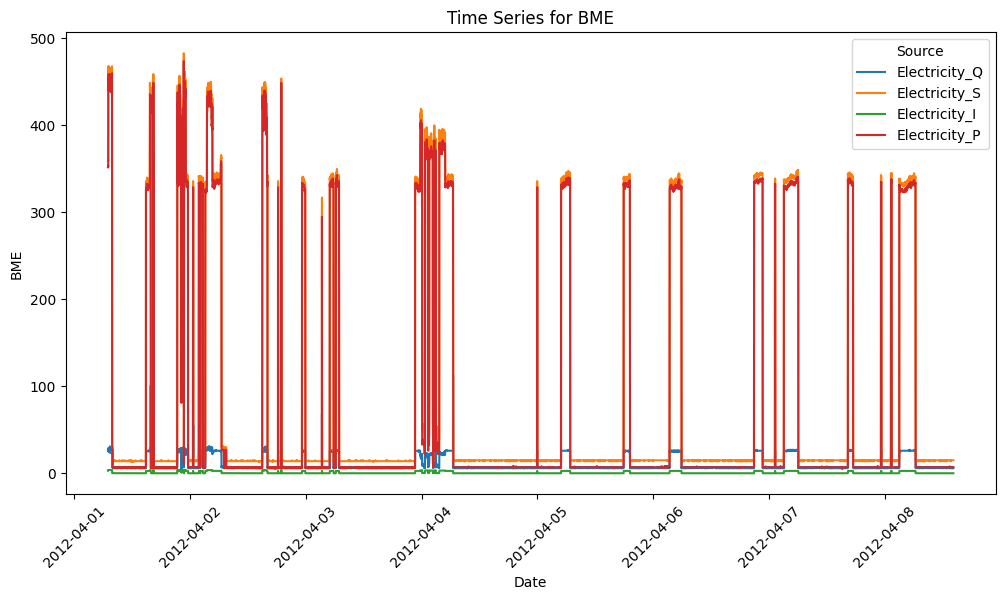

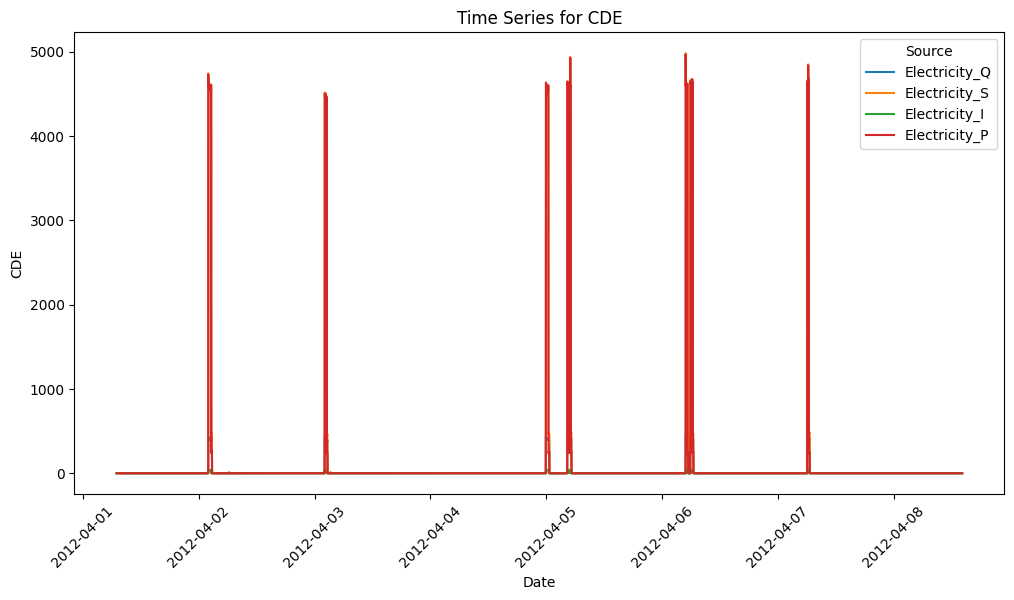

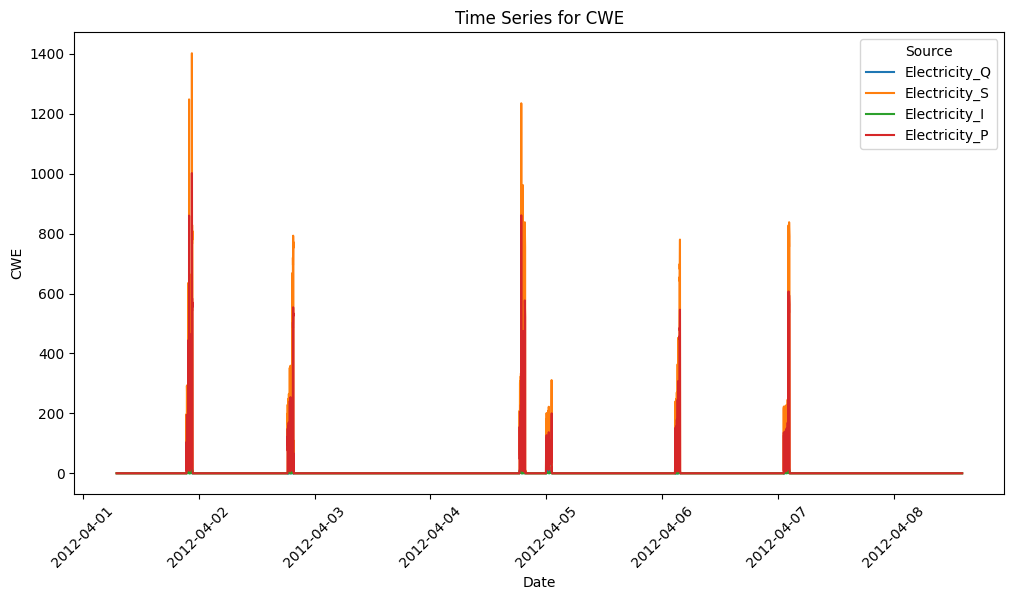

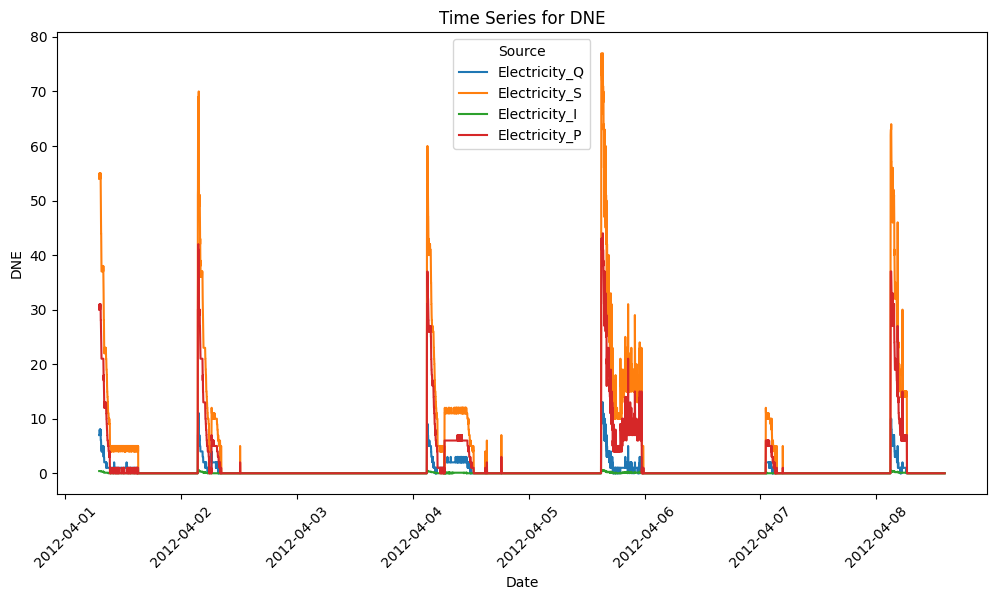

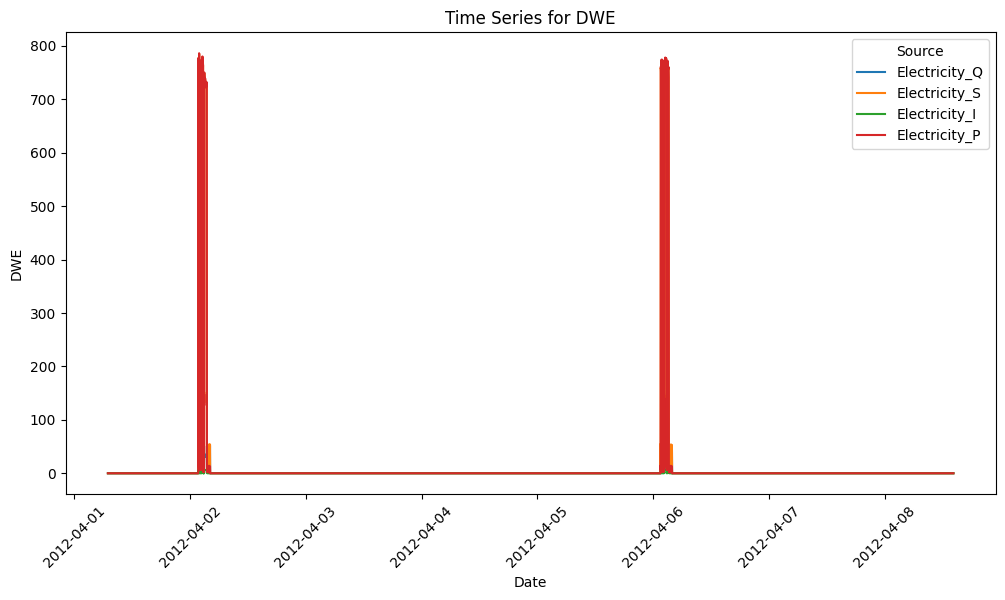

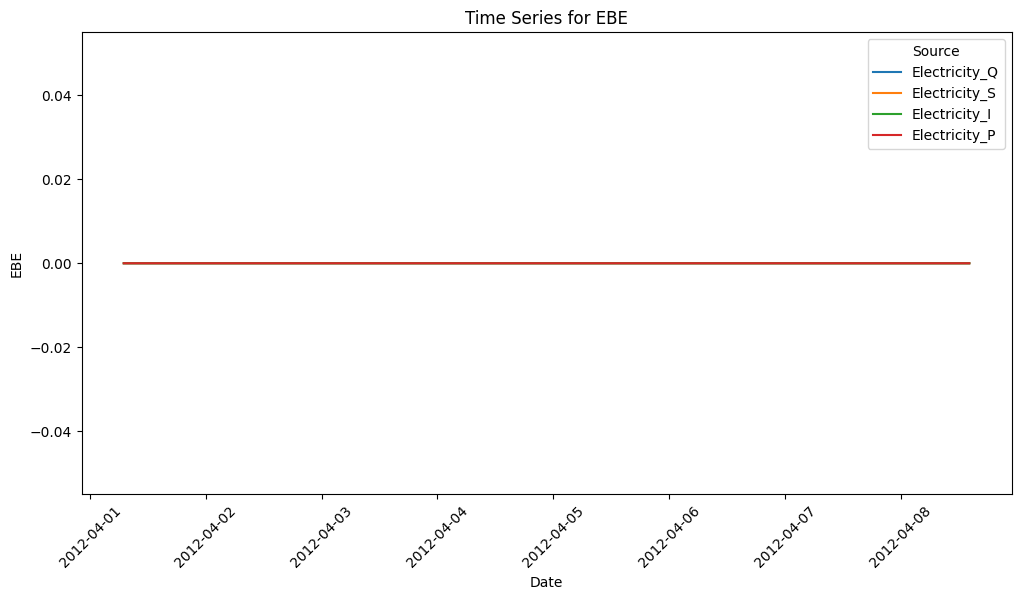

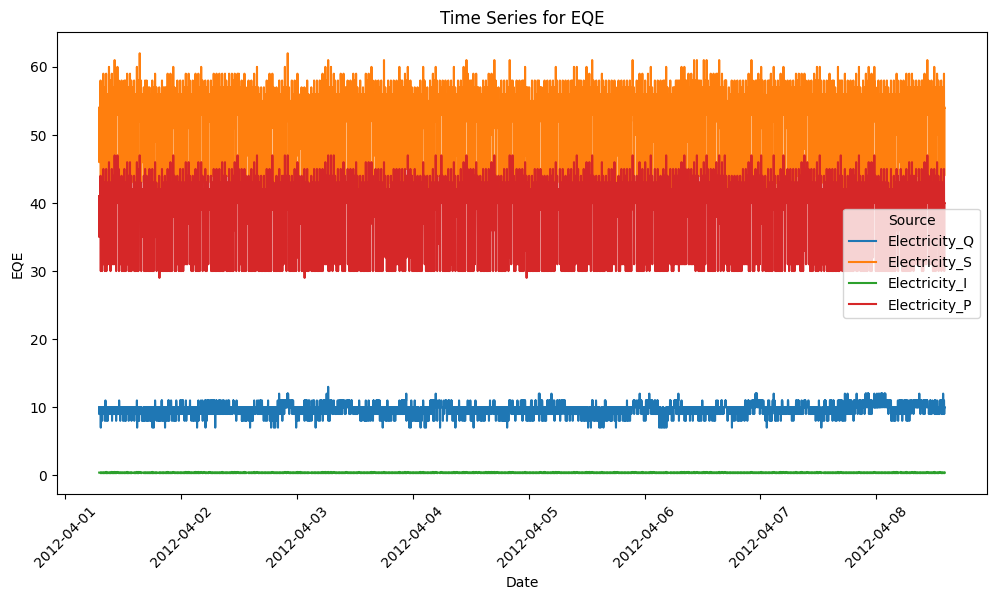

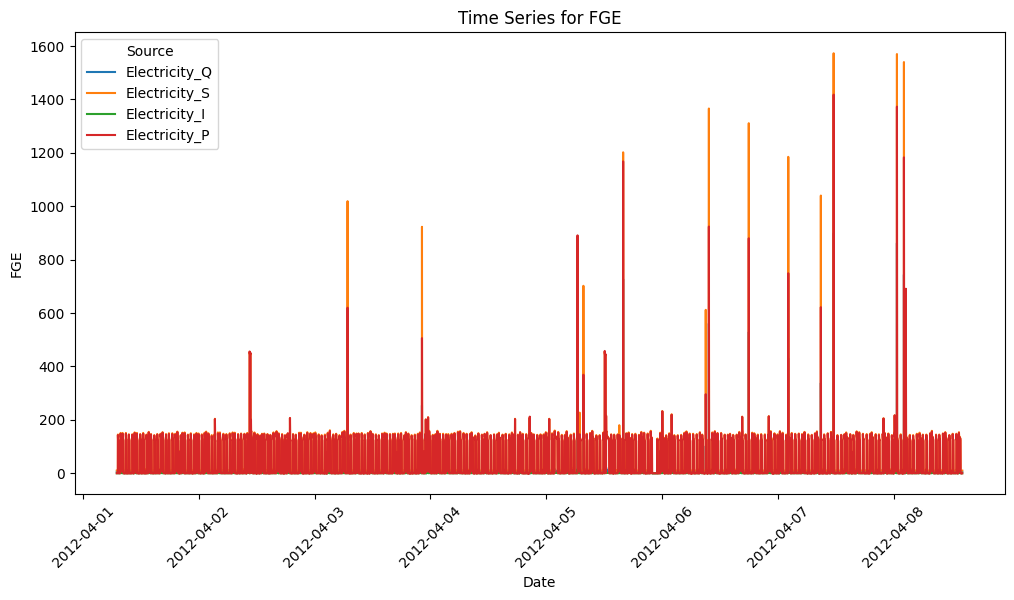

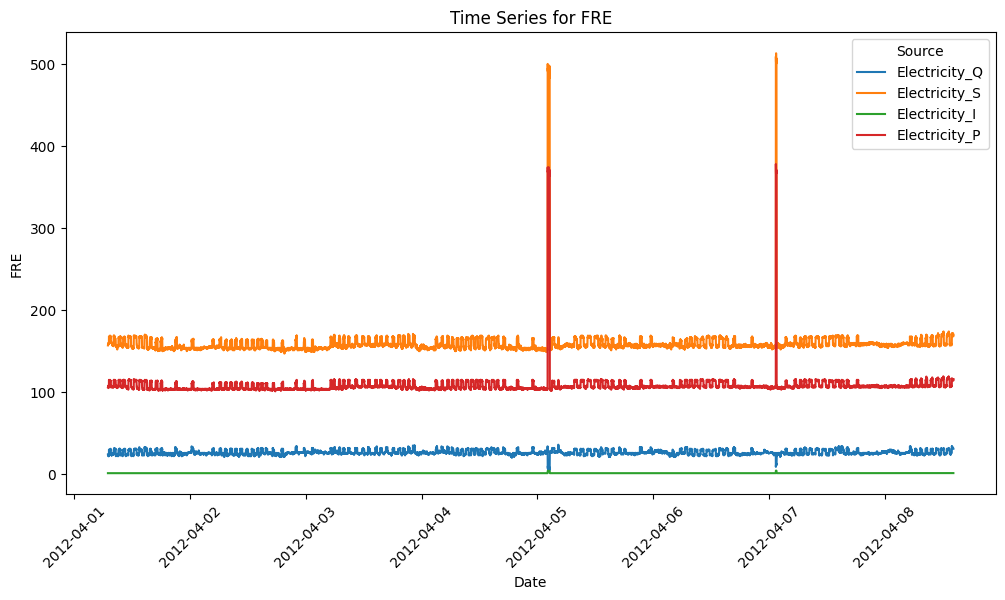

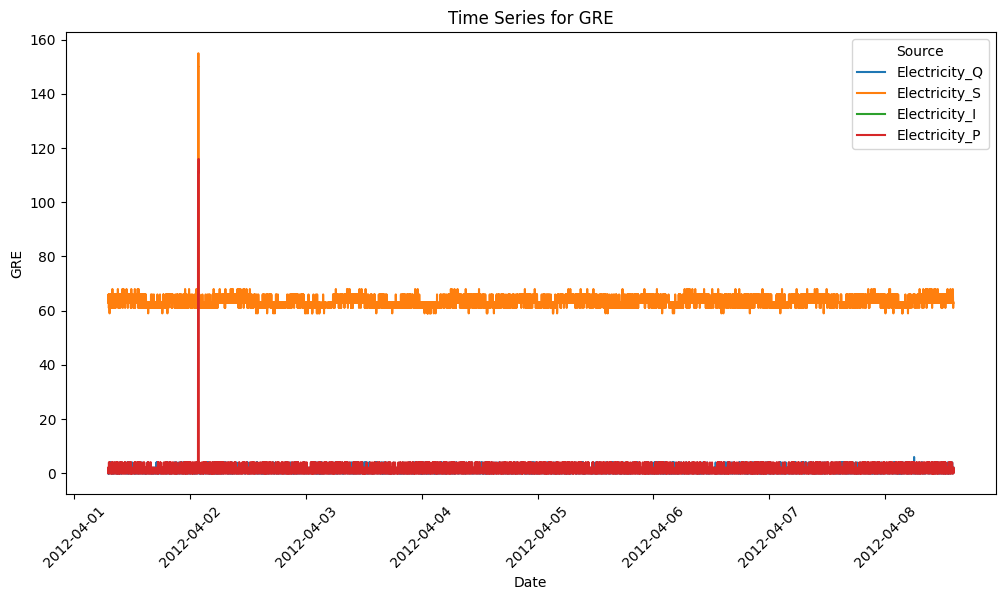

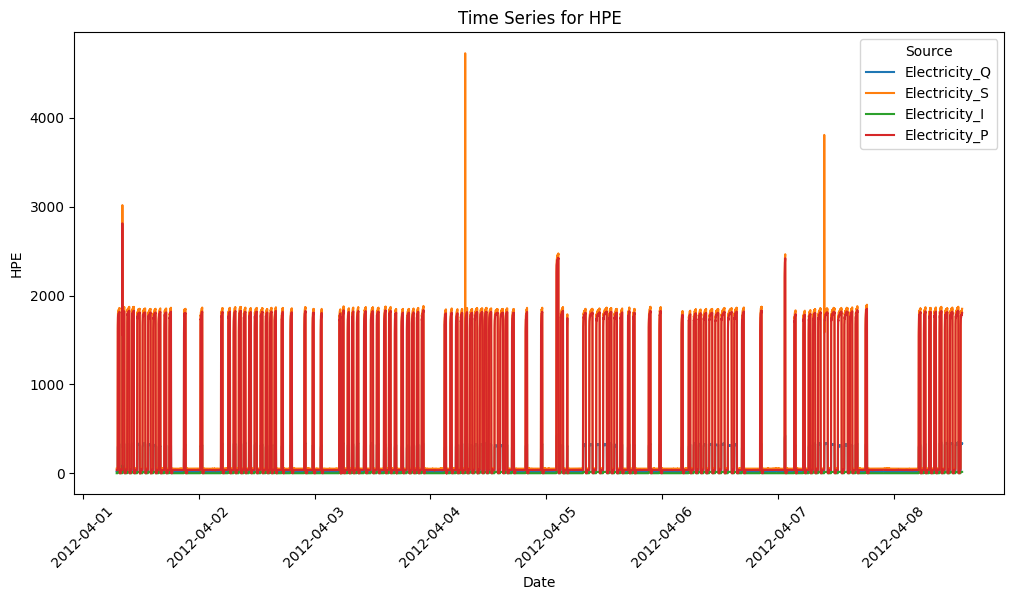

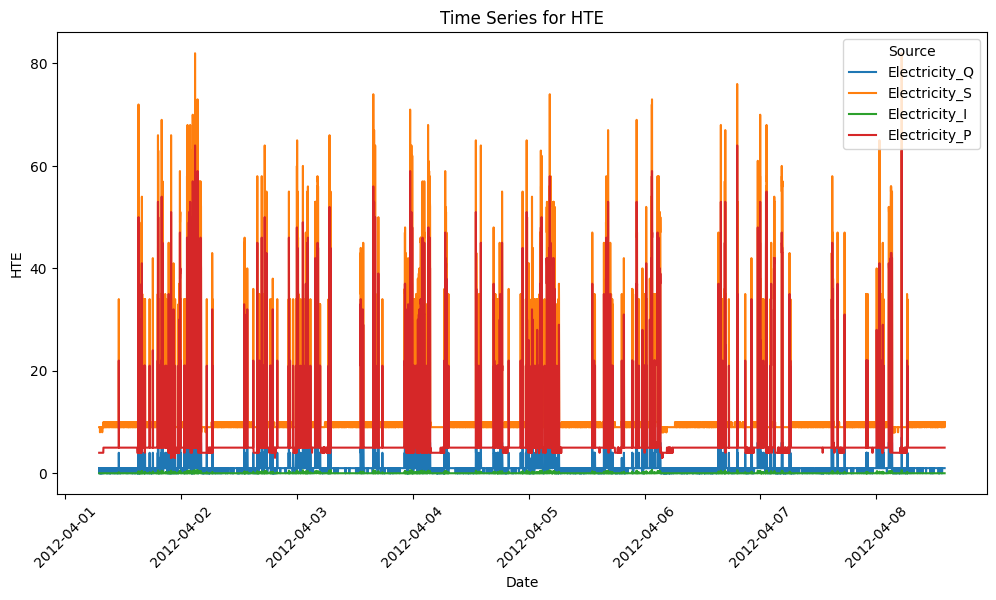

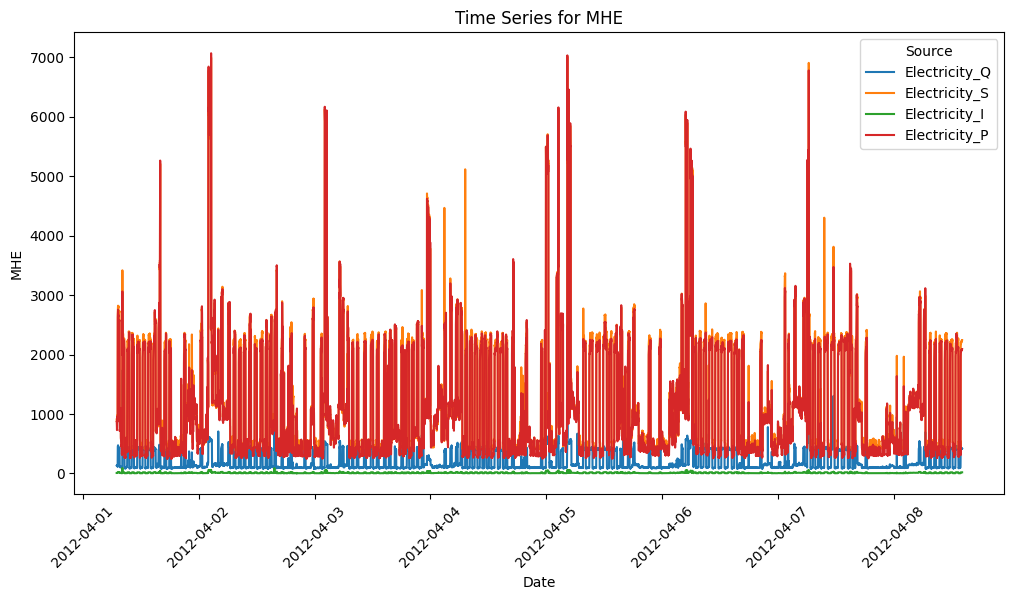

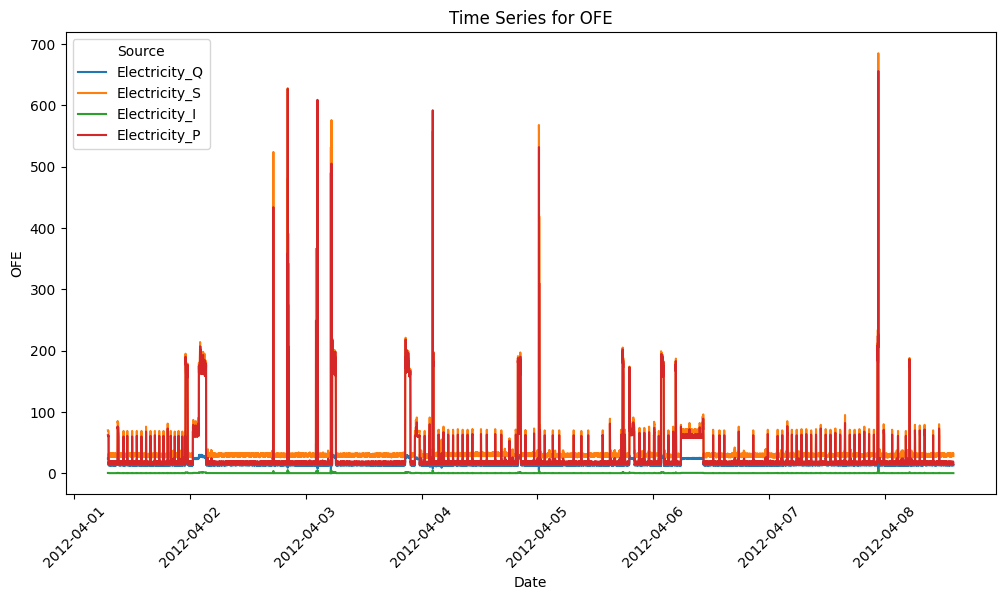

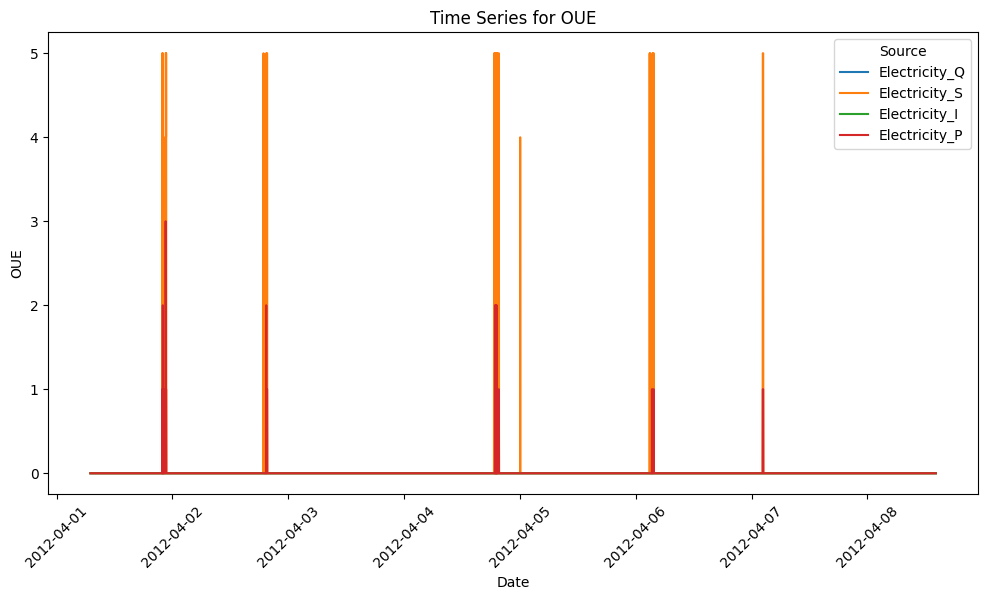

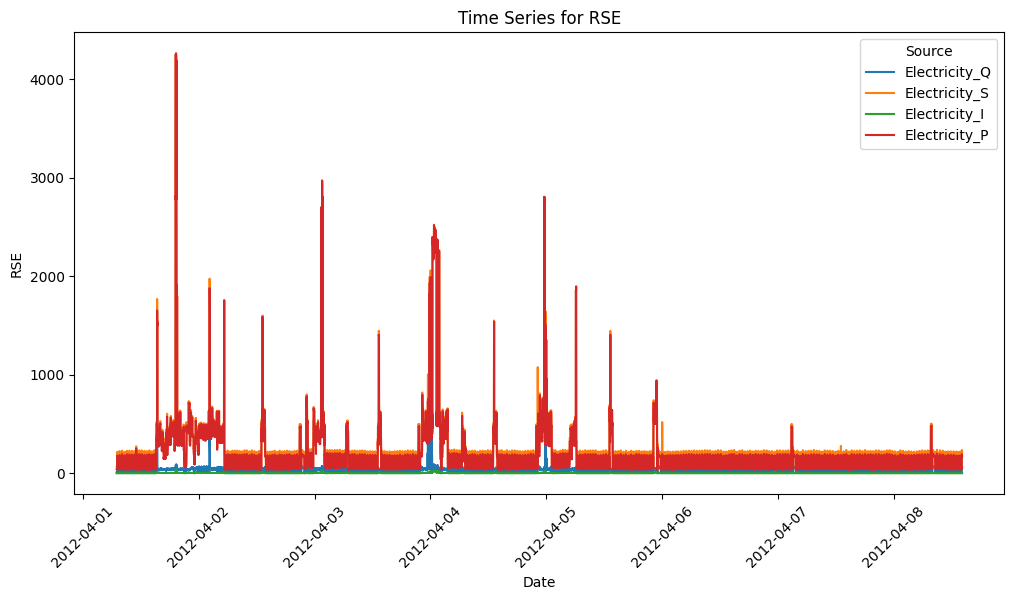

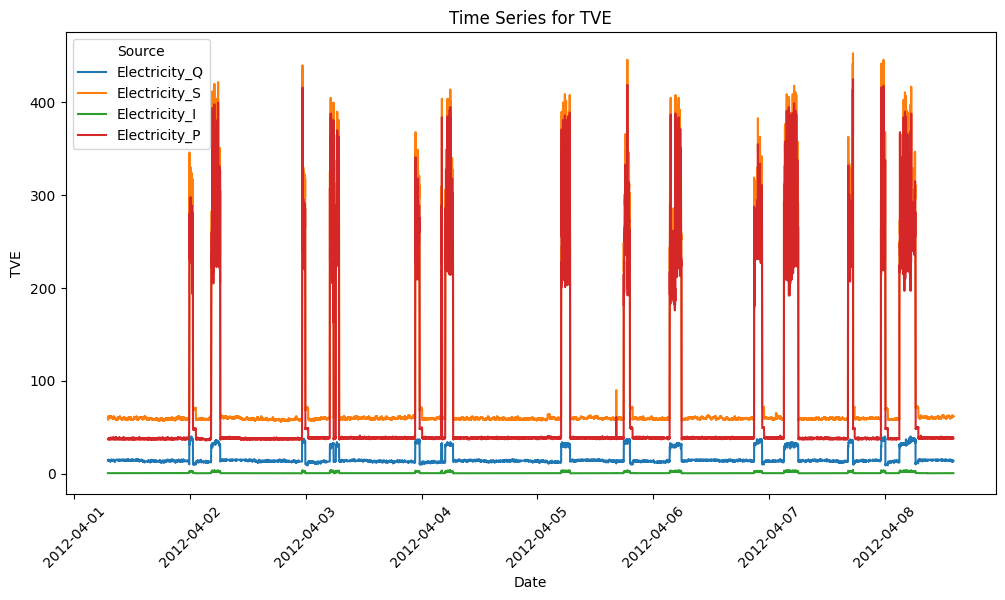

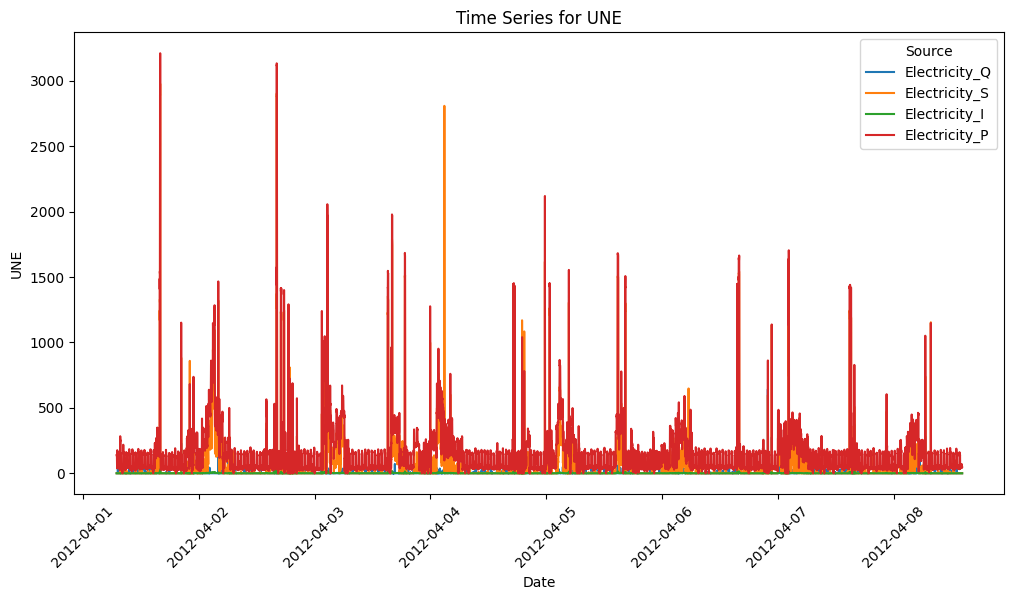

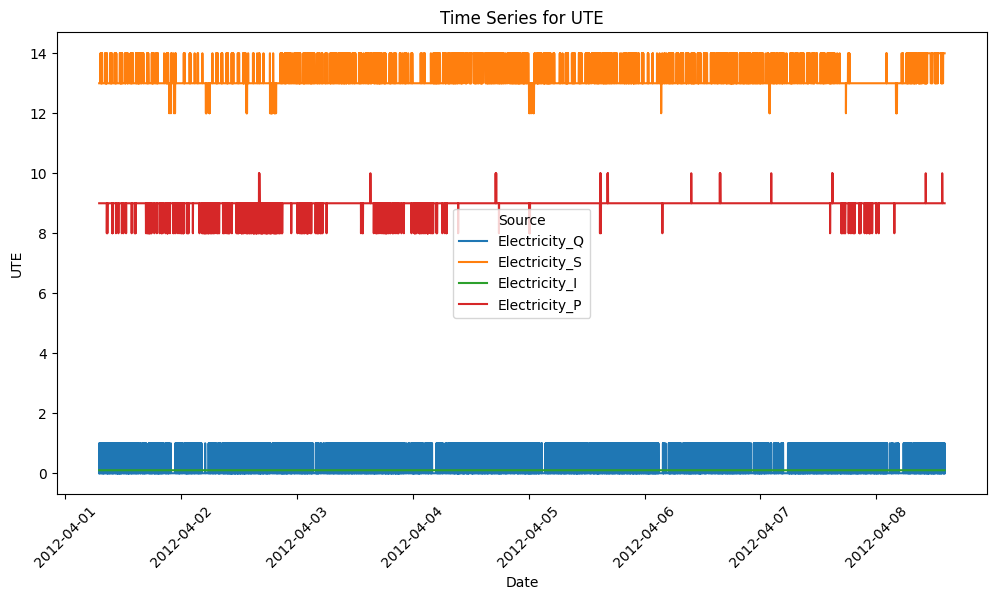

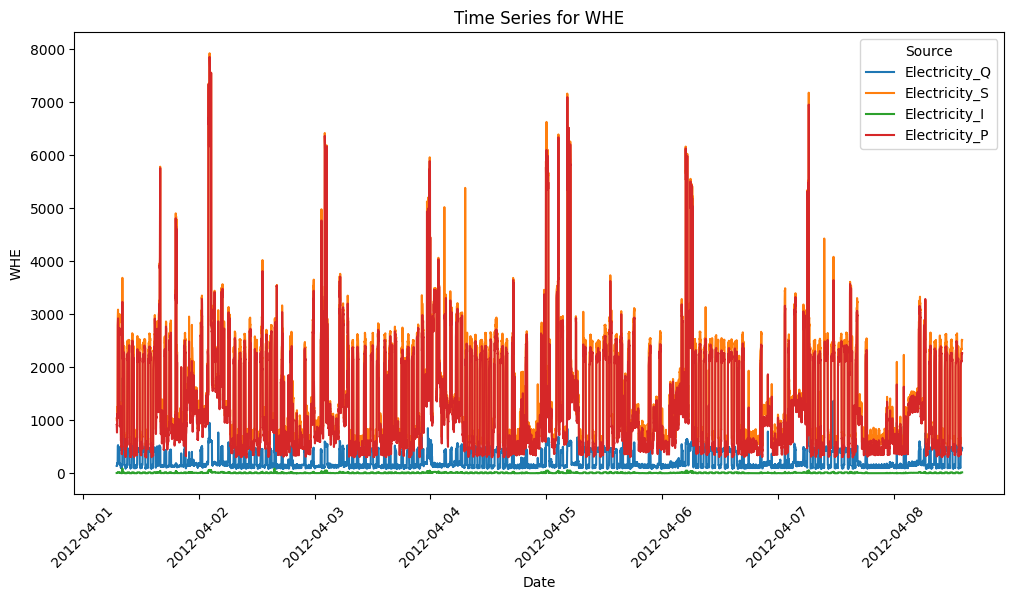

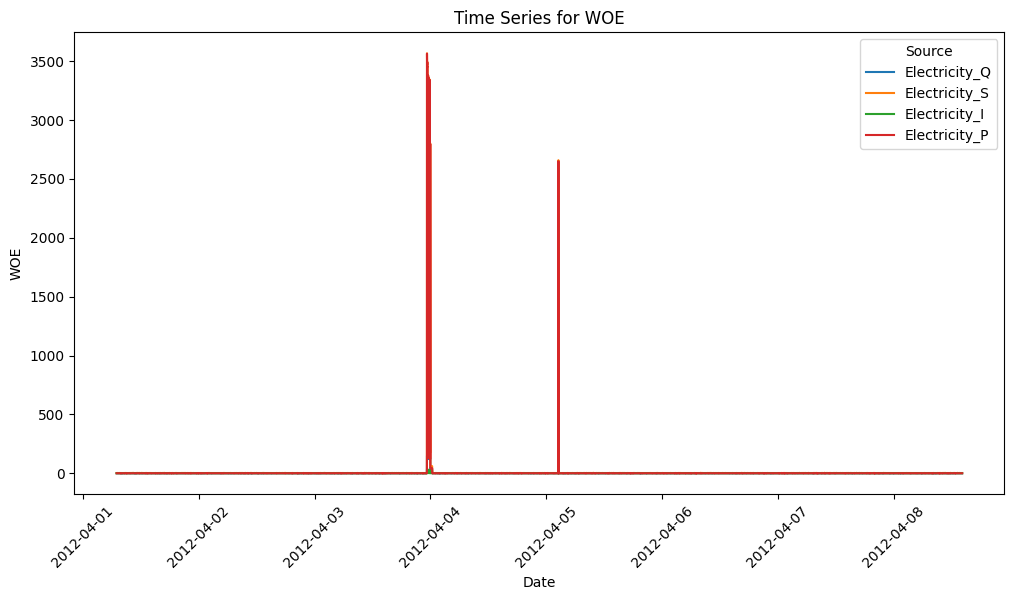

In [ ]:
# Assuming 'subsampled_df' is your DataFrame
# First, ensure 'date_timestamp' is in the correct datetime format
subsampled_df['date_timestamp'] = pd.to_datetime(subsampled_df['UNIX_TS'], unit='s')

# Identify the columns to plot (excluding 'unix_ts', 'source', 'date_timestamp')
measurement_columns = subsampled_df.columns.difference(['UNIX_TS', 'source', 'date_timestamp'])

# For each measurement column, create a chart
for measurement in measurement_columns:
    plt.figure(figsize=(12, 6))  # Adjust size as needed

    # Plot each source in the DataFrame
    for source in subsampled_df['source'].unique():
        # Filter data for the current source
        df_filtered = subsampled_df[subsampled_df['source'] == source]

        # Plot the measurement data
        plt.plot(df_filtered['date_timestamp'], df_filtered[measurement], label=source)

    # Customize the plot
    plt.title(f'Time Series for {measurement}')
    plt.xlabel('Date')
    plt.ylabel(measurement)
    plt.legend(title='Source')
    plt.xticks(rotation=45)  # Rotate date labels for better readability

    # Show the plot
    plt.show()

#### Log-Scaled Values

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample setup for demonstration
# Assuming 'subsampled_df' is your DataFrame and it's already defined
# subsampled_df['date_timestamp'] = pd.to_datetime(subsampled_df['UNIX_TS'], unit='s')

# Identify the columns to plot (excluding 'UNIX_TS', 'source', 'date_timestamp')
measurement_columns = subsampled_df.columns.difference(['UNIX_TS', 'source', 'date_timestamp'])

# For each measurement column, create a chart
for measurement in measurement_columns:
    plt.figure(figsize=(12, 6))  # Adjust size as needed

    # Plot each source in the DataFrame
    for source in subsampled_df['source'].unique():
        # Filter data for the current source
        df_filtered = subsampled_df[subsampled_df['source'] == source]

        # Plot the measurement data
        plt.plot(df_filtered['date_timestamp'], df_filtered[measurement], label=source)

    # Customize the plot
    plt.title(f'Time Series for {measurement}')
    plt.xlabel('Date')
    plt.ylabel(measurement)
    plt.yscale('log')  # Set the y-axis to a logarithmic scale
    plt.legend(title='Source')
    plt.xticks(rotation=45)  # Rotate date labels for better readability

    # Show the plot
    plt.show()


KeyError: 'date_timestamp'

<Figure size 1200x600 with 0 Axes>

### Time Series Decomposition

In [ ]:
# Convert UNIX_TS to datetime and sort
subsampled_df['date_timestamp'] = pd.to_datetime(subsampled_df['UNIX_TS'], unit='s')
subsampled_df.sort_values('date_timestamp', inplace=True)

# If you haven't already set 'date_timestamp' as the index
subsampled_df.set_index('date_timestamp', inplace=True)


<ipython-input-47-3342cc299c67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_df['date_timestamp'] = pd.to_datetime(subsampled_df['UNIX_TS'], unit='s')
<ipython-input-47-3342cc299c67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsampled_df.sort_values('date_timestamp', inplace=True)


In [ ]:
# Example for aggregating one measurement, let's say "I", across sources by mean
# This is just an illustrative example; adjust based on your actual needs
if 'I' in subsampled_df.columns:
    series = subsampled_df.groupby(subsampled_df.index)['I'].mean()
else:
    print("Measurement column 'I' not found. Please check your DataFrame columns.")


Measurement column 'I' not found. Please check your DataFrame columns.


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure 'series' is a pandas Series with datetime index and no missing values
# Fill or drop missing values as necessary
series.dropna(inplace=True)

# Perform decomposition
result = seasonal_decompose(series, model='additive', period=1)  # Adjust 'period' based on your data's seasonality

# Plot the decomposed components
result.plot()
plt.show()


NameError: name 'series' is not defined

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'subsampled_df' is your DataFrame and it has a 'date_timestamp' column and a measurement column
# Let's say the measurement column you are interested in is 'measurement'

# Ensure 'date_timestamp' is in datetime format and set as the DataFrame index
subsampled_df['date_timestamp'] = pd.to_datetime(subsampled_df['date_timestamp'])
subsampled_df.set_index('date_timestamp', inplace=True)

# Selecting a measurement column for decomposition, assume 'measurement' is your column of interest
series = subsampled_df['measurement']

# Decompose the time series
# The model can be 'additive' or 'multiplicative', depending on the nature of your series
decomposition = seasonal_decompose(series, model='additive', period=1)  # Adjust the period according to your series' seasonality

# Plot the decomposed components of the time series
fig = decomposition.plot()
plt.show()


KeyError: 'date_timestamp'